In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
%matplotlib inline
plt.style.use('fivethirtyeight')

In [15]:
stroke_data = pd.read_csv('stroke.csv')
stroke_data.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [16]:
stroke_data.shape

(5110, 12)

In [17]:
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [18]:
mv = pd.DataFrame(stroke_data.isnull().sum(), columns=['No. of missing values'])
mv['% missing_values'] = (mv/len(stroke_data)).round(2)*100
mv

,No. of missing values,% missing_values
id,0,0.0
gender,0,0.0
age,0,0.0
hypertension,0,0.0
heart_disease,0,0.0
ever_married,0,0.0
work_type,0,0.0
Residence_type,0,0.0
avg_glucose_level,0,0.0
bmi,201,4.0


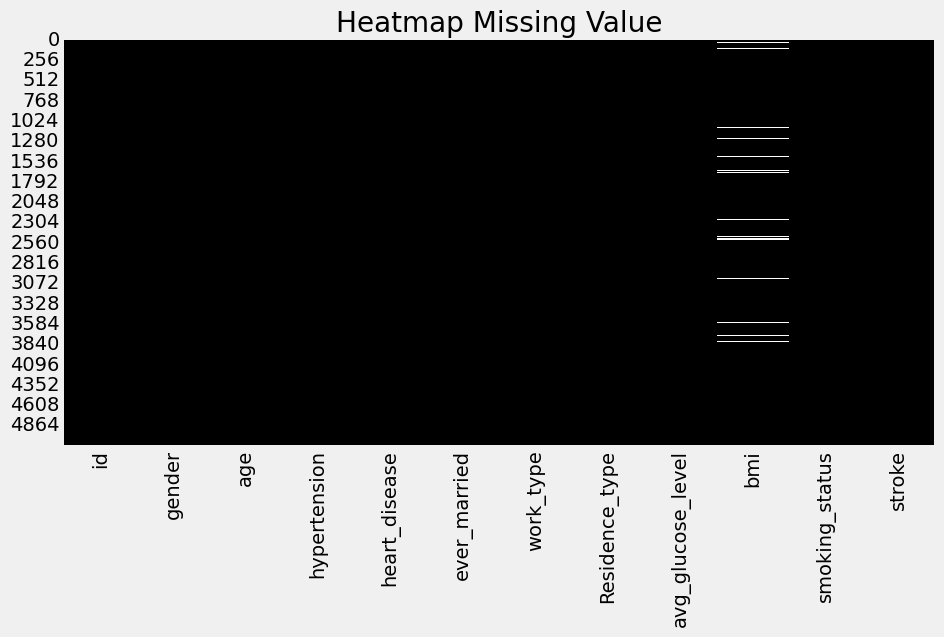

In [19]:
plt.figure(figsize=(10,5))
sns.heatmap(stroke_data.isnull(), cbar = False, cmap="gray")
plt.title('Heatmap Missing Value')
plt.show()

untuk missing value saya hapus baris yang memiliki missing value dikarenakan jumlah dari barisnya hanya 4% maka tidak akan mempengaruhi dari data training nantinya

In [20]:
data_clean = stroke_data.dropna(subset = ['bmi'])
data_clean = data_clean.drop(columns=['id'])


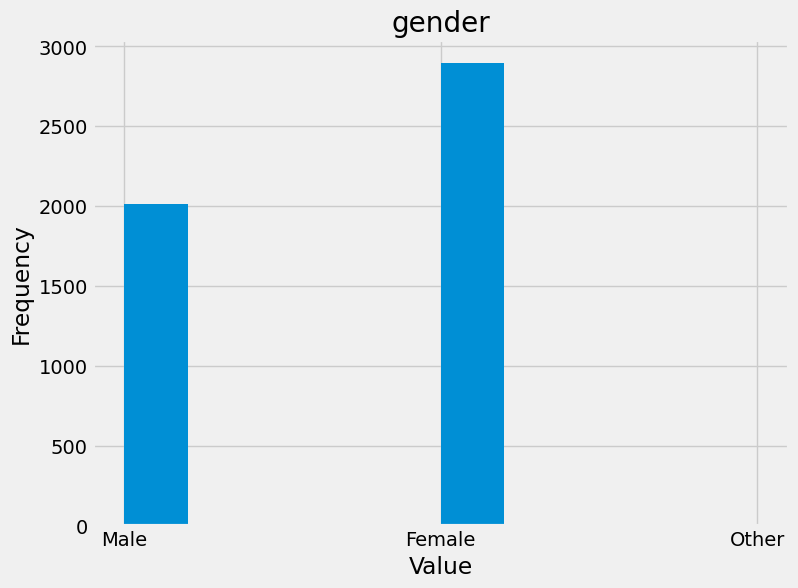

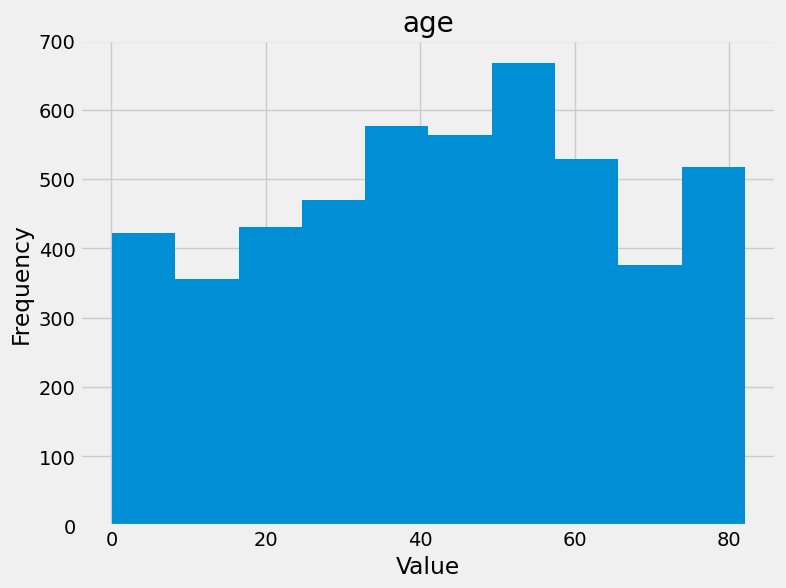

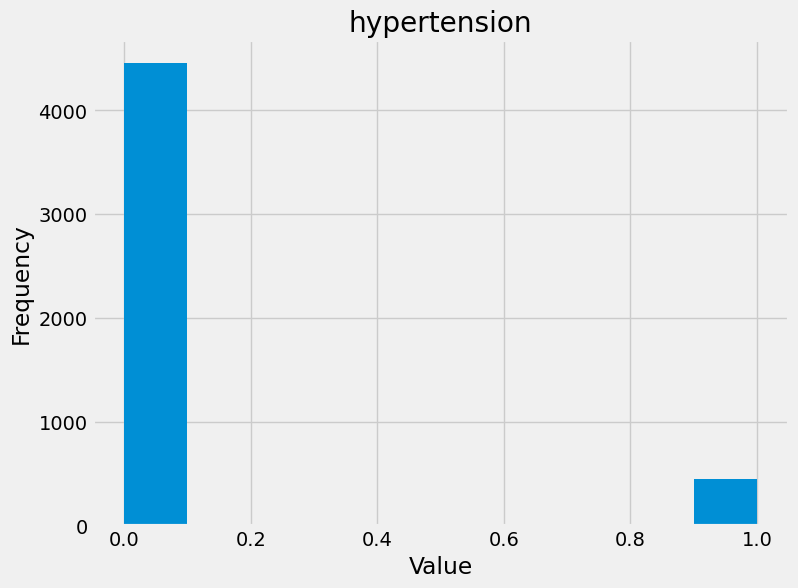

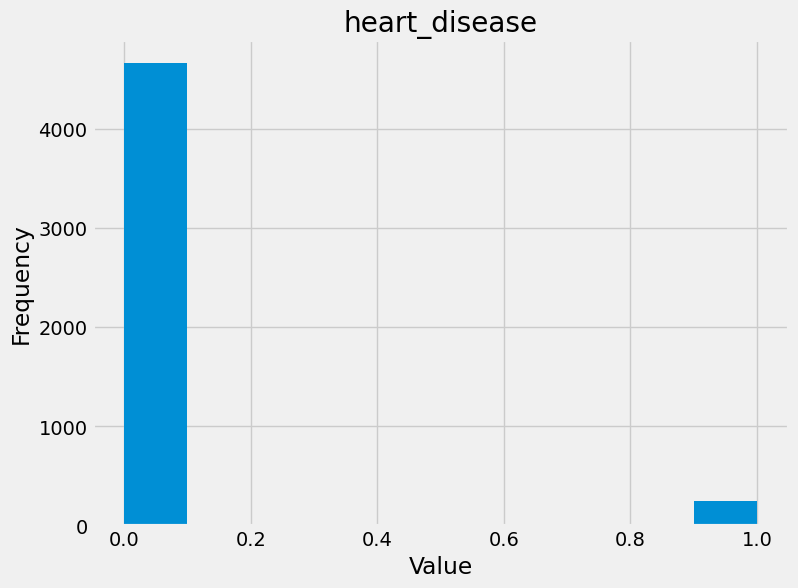

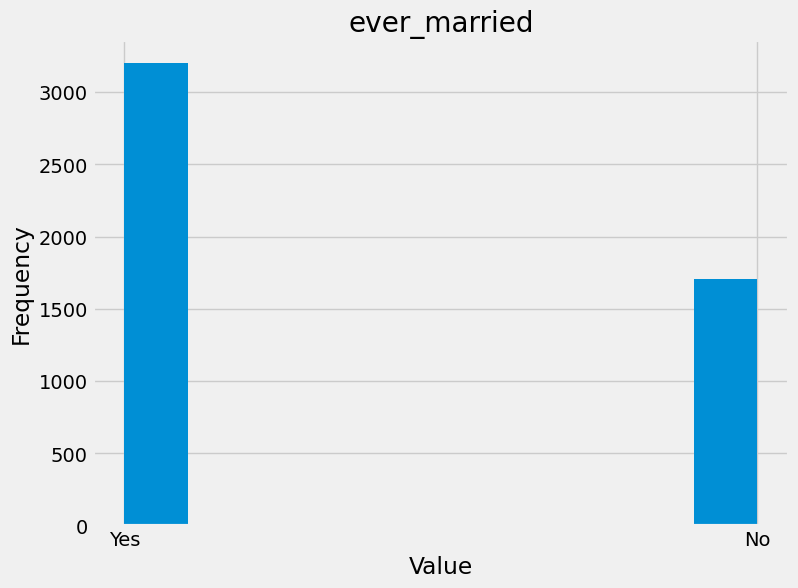

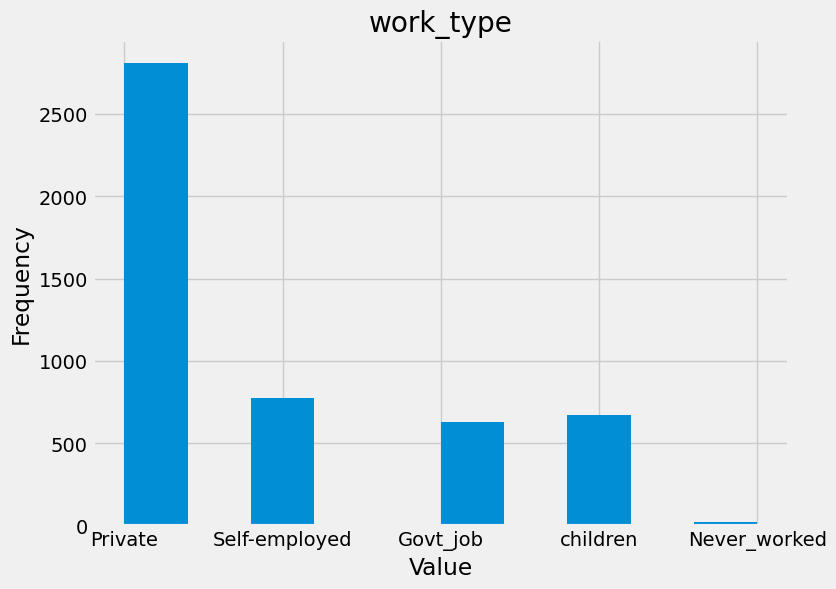

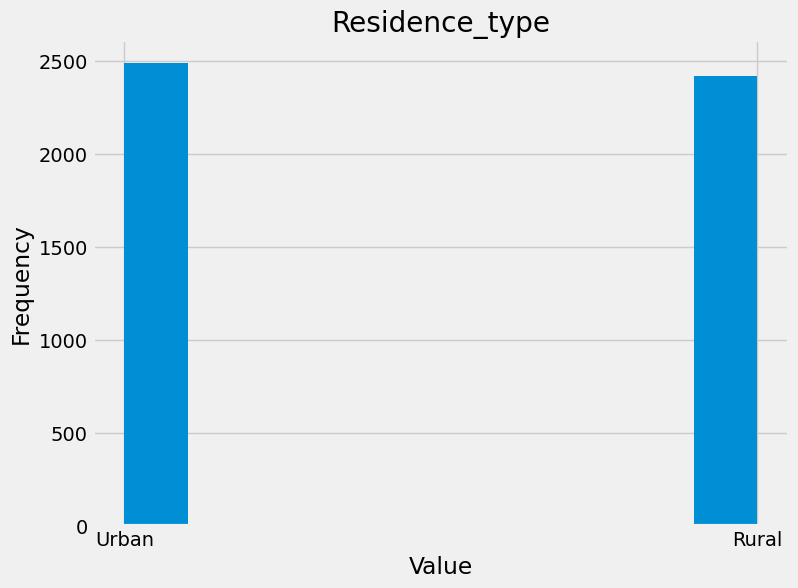

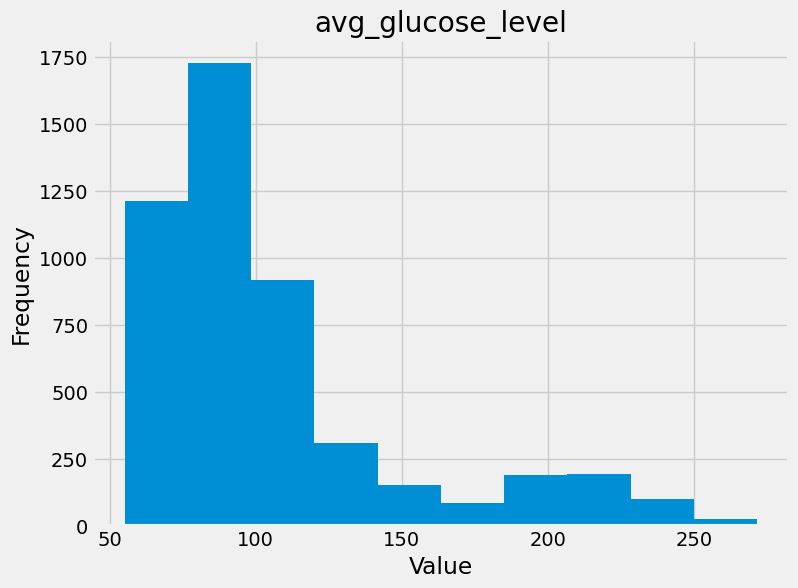

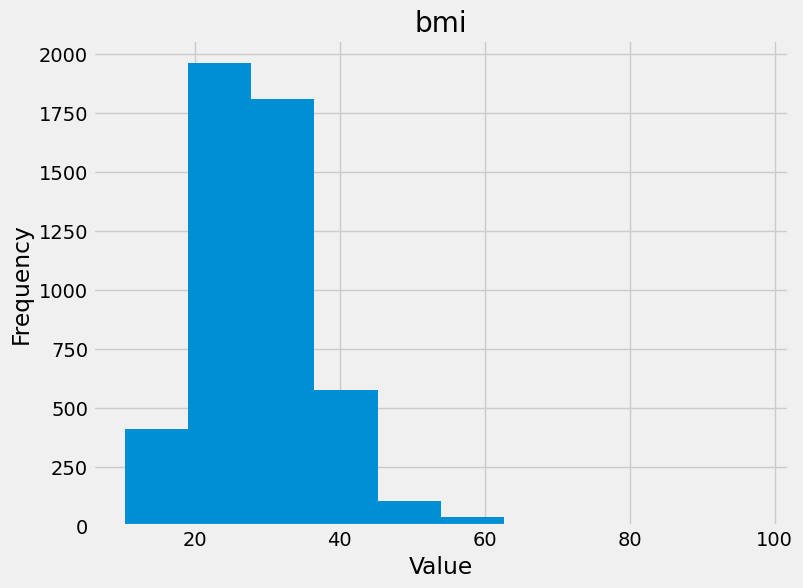

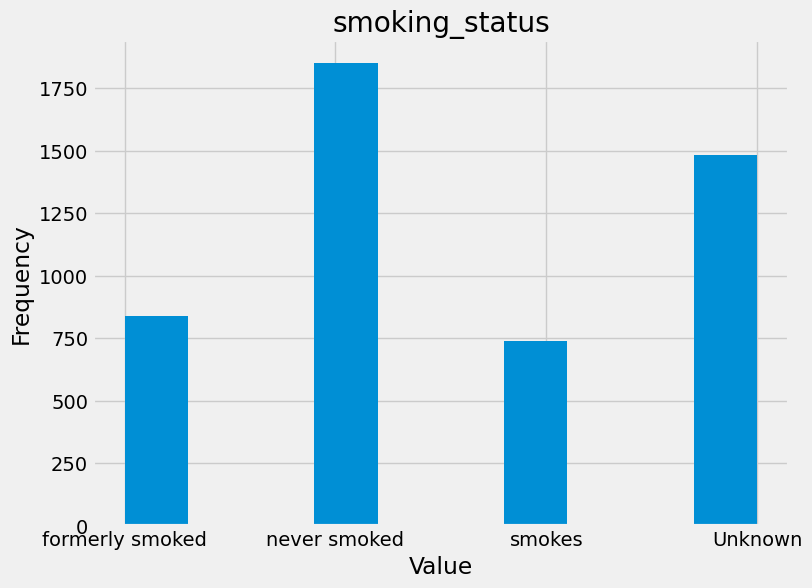

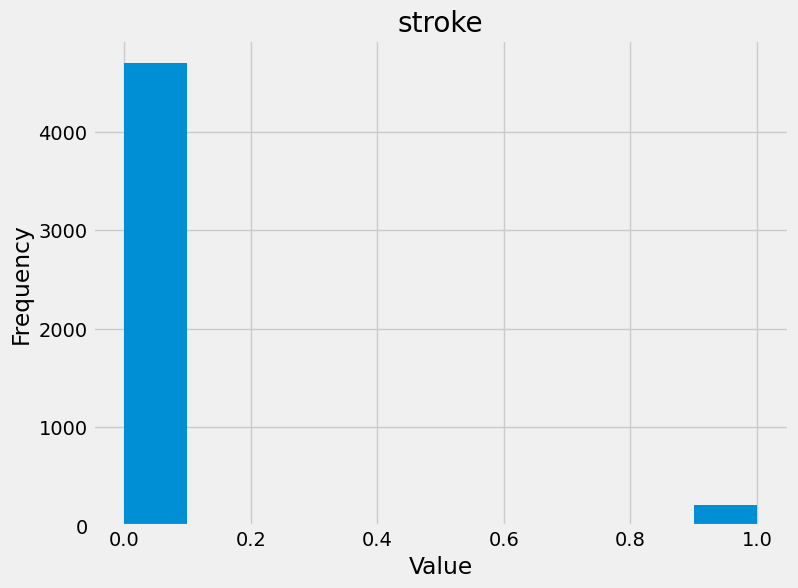

In [21]:
for col in data_clean.columns:
    plt.figure(figsize=(8, 6))
    data_clean[col].hist()
    plt.title(col)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

data akan displit menjadi beberapa bagian misalkan pada data yang memiliki data yang diklasifikasikan seperti work_type, smoking_status dan lainnya

In [22]:
data_clean = pd.get_dummies(data_clean, ['gender','ever_married', 'work_type','Residence_type', 'smoking_status'], drop_first = True)
data_clean[["age","gender_Male","gender_Other","ever_married_Yes","work_type_Never_worked","work_type_Private","work_type_Self-employed","work_type_children","Residence_type_Urban","smoking_status_formerly smoked","smoking_status_never smoked",
"smoking_status_smokes"]] = data_clean[["age","gender_Male","gender_Other","ever_married_Yes","work_type_Never_worked","work_type_Private","work_type_Self-employed","work_type_children","Residence_type_Urban","smoking_status_formerly smoked","smoking_status_never smoked",
"smoking_status_smokes"]].astype(int)
data_clean.head(4)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67,0,1,228.69,36.6,1,1,0,1,0,1,0,0,1,1,0,0
2,80,0,1,105.92,32.5,1,1,0,1,0,1,0,0,0,0,1,0
3,49,0,0,171.23,34.4,1,0,0,1,0,1,0,0,1,0,0,1
4,79,1,0,174.12,24.0,1,0,0,1,0,0,1,0,0,0,1,0


In [23]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4909 entries, 0 to 5109
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             4909 non-null   int32  
 1   hypertension                    4909 non-null   int64  
 2   heart_disease                   4909 non-null   int64  
 3   avg_glucose_level               4909 non-null   float64
 4   bmi                             4909 non-null   float64
 5   stroke                          4909 non-null   int64  
 6   gender_Male                     4909 non-null   int32  
 7   gender_Other                    4909 non-null   int32  
 8   ever_married_Yes                4909 non-null   int32  
 9   work_type_Never_worked          4909 non-null   int32  
 10  work_type_Private               4909 non-null   int32  
 11  work_type_Self-employed         4909 non-null   int32  
 12  work_type_children              4909 no

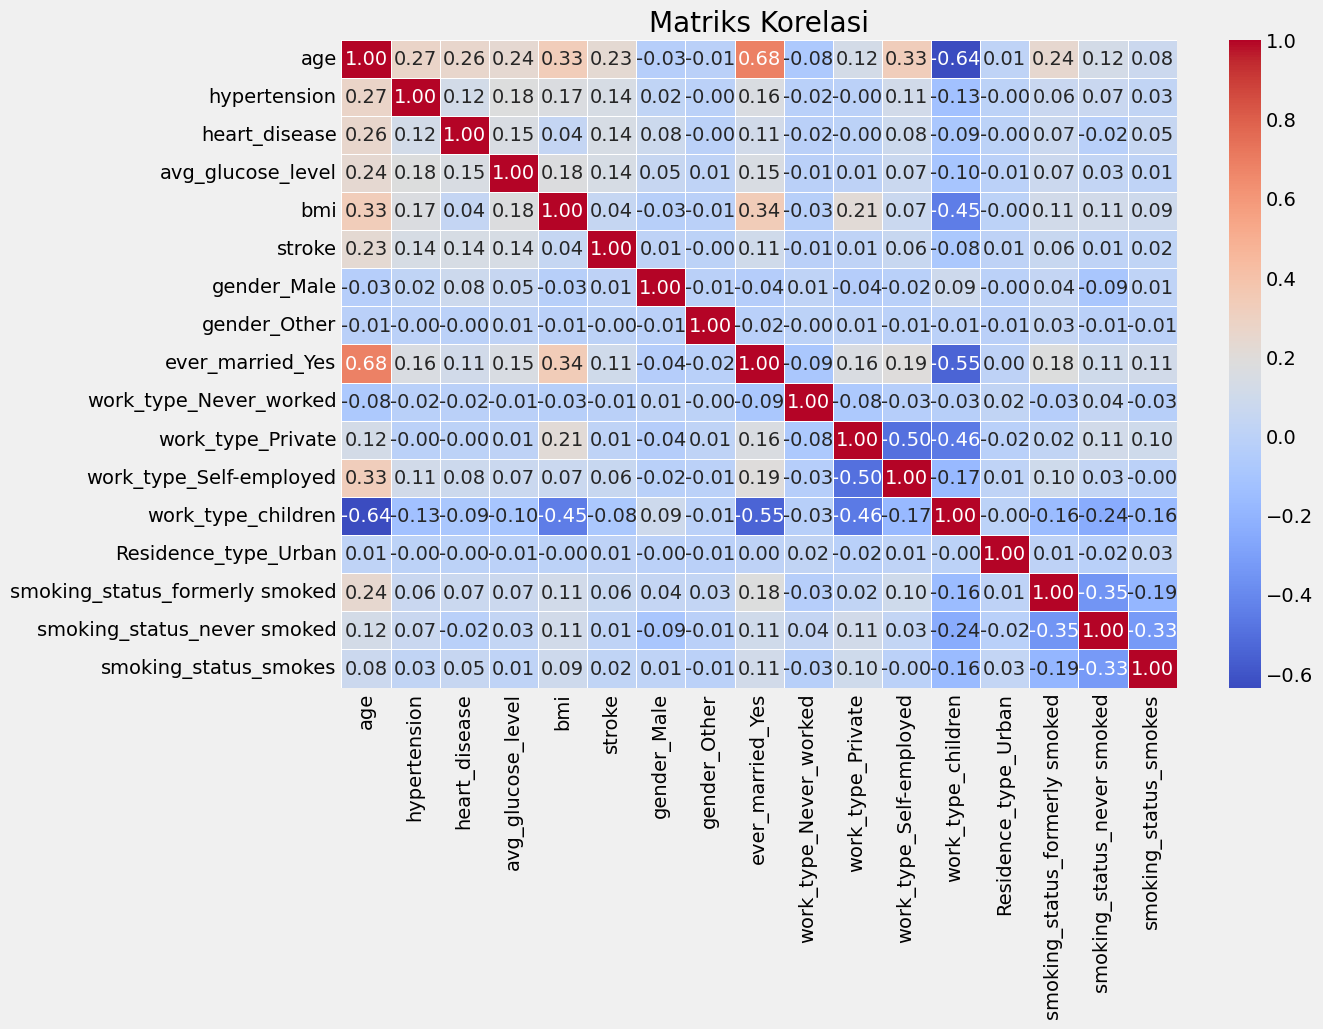

In [24]:
correlation_matrix = data_clean.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriks Korelasi')
plt.show()

Pada matrix korelasi terlihat bahwa hanya beberapa yang memiliki keterkaitan seperti yang terkuat dimiliki oleh age dengan ever_married_yes dan yang terendah dimiliki oleh work_type_children dengan age

In [28]:
X = data_clean.drop(columns=['stroke'])
y = data_clean['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [29]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_param_grid = {'max_depth': [None, 5, 10, 15],
                 'min_samples_split': [2, 5, 10],
                 'min_samples_leaf': [1, 2, 4]}
dt_grid_search = GridSearchCV(dt_classifier, dt_param_grid, cv=5)
dt_grid_search.fit(X_train, y_train)
best_dt_model = dt_grid_search.best_estimator_
y_pred_dt = best_dt_model.predict(X_test)
print("Decision Tree Classifier:")
print(classification_report(y_test, y_pred_dt))

Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       929
           1       0.00      0.00      0.00        53

    accuracy                           0.94       982
   macro avg       0.47      0.50      0.49       982
weighted avg       0.89      0.94      0.92       982



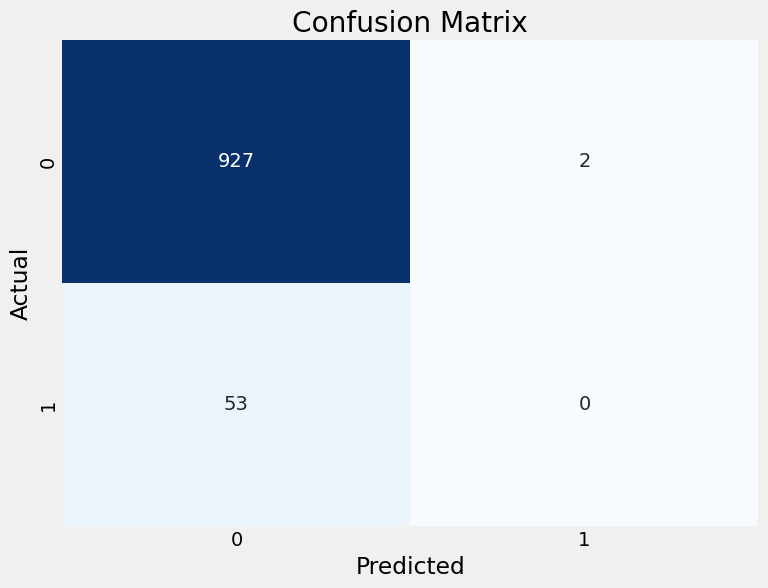

In [30]:
y_pred = best_dt_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [31]:
rf_classifier = RandomForestClassifier(random_state=42)

rf_param_grid = {'n_estimators': [100, 200, 300],
                 'max_depth': [None, 5, 10, 15],
                 'min_samples_split': [2, 5, 10],
                 'min_samples_leaf': [1, 2, 4]}
rf_grid_search = GridSearchCV(rf_classifier, rf_param_grid, cv=5)
rf_grid_search.fit(X_train, y_train)

best_rf_model = rf_grid_search.best_estimator_

y_pred_rf = best_rf_model.predict(X_test)
print("Random Forest Classifier:")
print(classification_report(y_test, y_pred_rf))

Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       929
           1       0.00      0.00      0.00        53

    accuracy                           0.95       982
   macro avg       0.47      0.50      0.49       982
weighted avg       0.89      0.95      0.92       982



c:\Users\Renz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Renz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Renz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

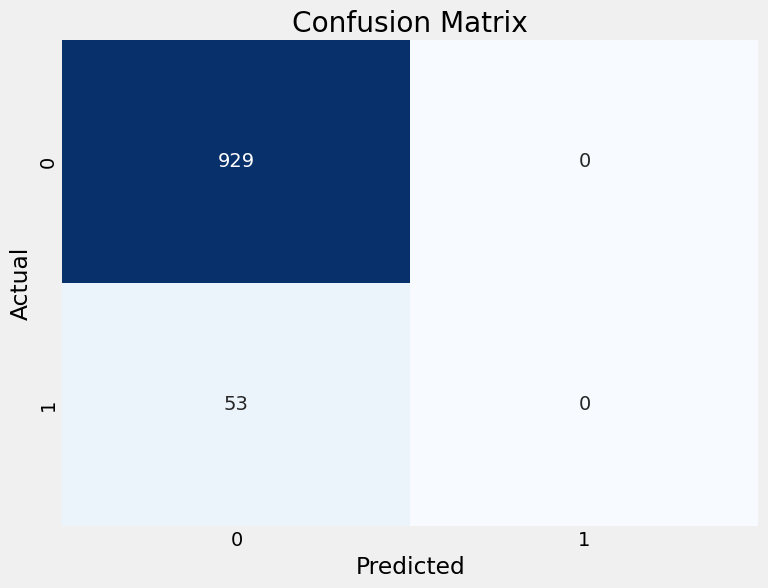

In [27]:
y_pred = best_rf_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()